<a href="https://colab.research.google.com/github/latte05/ML_training/blob/master/ML_Training_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
in_file = "data2.csv"
out_file = "kion10y.csv"

with open(in_file, "rt", encoding="Shift-JIS") as fr:
  lines = fr.readlines()
  
lines = ["年,月,日,気温,品質,均質\n"] + lines[5:]
lines = map(lambda v: v.replace('/',','), lines)
result = "".join(lines).strip()

with open(out_file,"wt", encoding="utf-8") as fw:
  fw.write(result)
  print("saved")

In [0]:
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/kujirahand/mlearn-sample/master/tenki2006-2016/kion10y.csv", "kion10y-2.csv")
import pandas as pd

#pd.read_csv("kion10y.csv")
df = pd.read_csv("kion10y-2.csv")

In [0]:
md = {}
for i, row in df.iterrows():
  m, d, v = (int(row['月']), int(row['日']), float(row['気温']))
  key = str(m) + "/" + str(d)
  if not(key in md): md[key] = []
  md[key] += [v]
  
#avg per date
avs = {}
for key in md:
  v = avs[key] = sum(md[key]) / len(md[key])
  print("{0} : {1}".format(key,v))

In [0]:
avs["11/3"]

年
2006     2
2007    11
2008     5
2010    21
2011     9
2012     8
2013    16
2014    12
2015     7
2016     1
Name: 年, dtype: int64


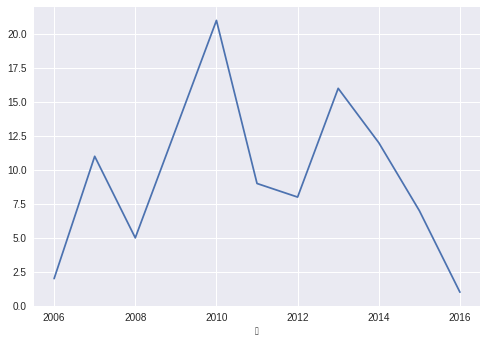

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

hotday_bool = (df["気温"] >30)
hotday = df[hotday_bool]
cnt = hotday.groupby(["年"])["年"].count()
print(cnt)
cnt.plot()
plt.show()

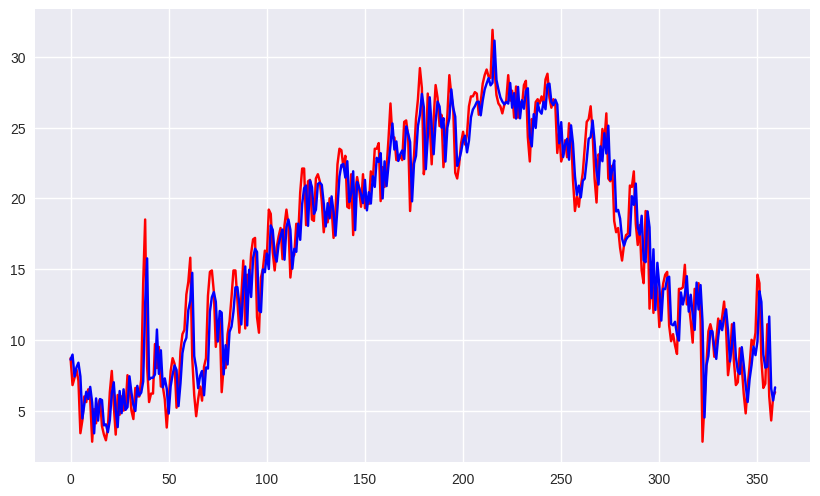

In [30]:
# Machine Learning
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("kion10y-2.csv", encoding="utf-8")

#train data split
train_year = (df["年"] <= 2015)
test_year = (df["年"] >= 2016)
interval = 6

# learning past 6 days data 
def make_data(data):
  x = [] #learning data
  y = [] #result
  temps = list(data["気温"])
  for i in range(len(temps)):
    if i < interval: continue
    y.append(temps[i])
    xa = []
    
    for p in range(interval):
      d = i + p - interval
      xa.append(temps[d])
    x.append(xa)
  return (x, y)

train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])


lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) #learning
pre_y = lr.predict(test_x) #predict

#plot
plt.figure(figsize=(10,6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.show()


In [31]:
diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y) / len(diff_y))
print("max=", max(diff_y))

average= 1.6640684971954243
max= 8.471949619908475
